<a href="https://colab.research.google.com/github/melodyrous/MIASHS2/blob/main/opti%26regul/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'optimisation ☕️☕️

L'objectif de cette séquence va être de construire des méthodes et des algorithmes permettant de trouver des minimum locaux et/ou globaux de fonctions. Soit $f:\mathbb{R}^d\mapsto\mathbb{R}$, nous souhaitons résoudre (ou du moins sur une partie du domaine de définition de la fonction $f$) le problème suivant&nbsp;:

$$x^\star=\text{argmin}_{x\in\mathbb{R}^d}f(x).$$

## Imports et fonction de plot

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Le code ci-dessous permettra d'afficher notre fonction à optimiser

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

def plot_loss_contour(obj_func, param_trace=None, figsize=None, three_dim=False, rotate=12, 
                      starting=None, ending=None, constraint=None, title=None):
    
    x, y = np.mgrid[slice(-5, 5 + 0.1, 0.1),
                    slice(-5, 5 + 0.1, 0.1)]
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = obj_func([x[i, j], y[i, j]])
    if figsize is not None:
        f = plt.figure(figsize=figsize)
    else:
        f = plt.figure(figsize=(12.0, 8.0))
    if three_dim:
        ax = f.gca(projection='3d')
    else:
        ax = f.gca()
    
    if three_dim:
        m = ax.plot_surface(x, y, z, cmap=cm.viridis)
    else:
        m = ax.contourf(x, y, z, levels = 15)
    #
    if param_trace is not None:
        if three_dim:
            eps = 0.5
            ax.plot(param_trace[:, 0], param_trace[:, 1], param_trace[:, 2] + eps, 
                    color='red')
            ax.view_init(65, rotate)
                
        else:
            if type(param_trace) is not tuple:
                param_trace = [param_trace]
            for p in param_trace:
                p = np.array(p) if type(p) is list else p
                plt.plot(p[:, 0], p[:, 1])
                plt.scatter(p[:, 0], p[:, 1])
            f.colorbar(m)
    if starting is not None:
        if three_dim:
            z = obj_func(starting)
            plt.plot([starting[0], starting[0]], [starting[1], starting[1]], [z, z+0.1], lw=4, 
                     color='red', label='Initialisation de l\'optimisation')
            plt.legend()
        else:
            plt.scatter(starting[0], starting[1], color='red', 
                        label='Initialisation de l\'optimisation')
            plt.legend()
            
    if constraint is not None:
        if not three_dim:
            plt.plot(constraint[:, 0], constraint[:, 1], color='red', label='Contrainte')
            plt.legend()
                
    if ending is not None:
        if three_dim:
            z = obj_func(ending)
            plt.plot([ending[0], ending[0]], [ending[1], ending[1]], [z, z+0.1], lw=4, 
                     color='green', label='Solution de l\'optimisation')
            plt.legend()
        else:
            plt.scatter(ending[0], ending[1], color='green', 
                        label='Solution de l\'optimisation')
            plt.legend()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    if title is not None:
        plt.title(title)
    plt.show()

## I. La descente de gradient (à pas constant)
### A. L'algorithme

Considérons la fonction suivante qui admet plusieurs minimums locaux.

In [2]:
def f(x):
    x, y = x
    return np.sqrt((x**2 + y - 2)**2 + (x + y**2 - 7)**2)

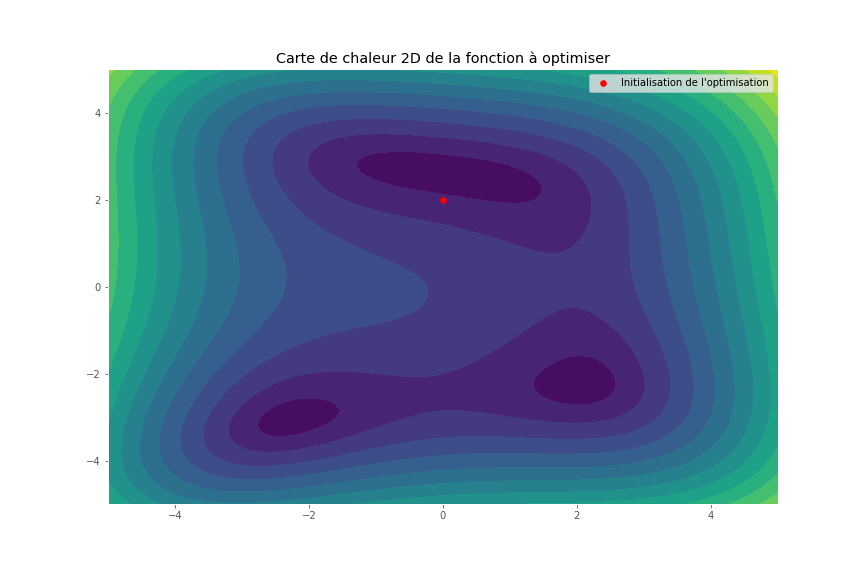

In [3]:
plot_loss_contour(f, three_dim=False, starting=[0, 2], 
                  title='Carte de chaleur 2D de la fonction à optimiser')

Il est également possible de la représenter en 3 dimensions.

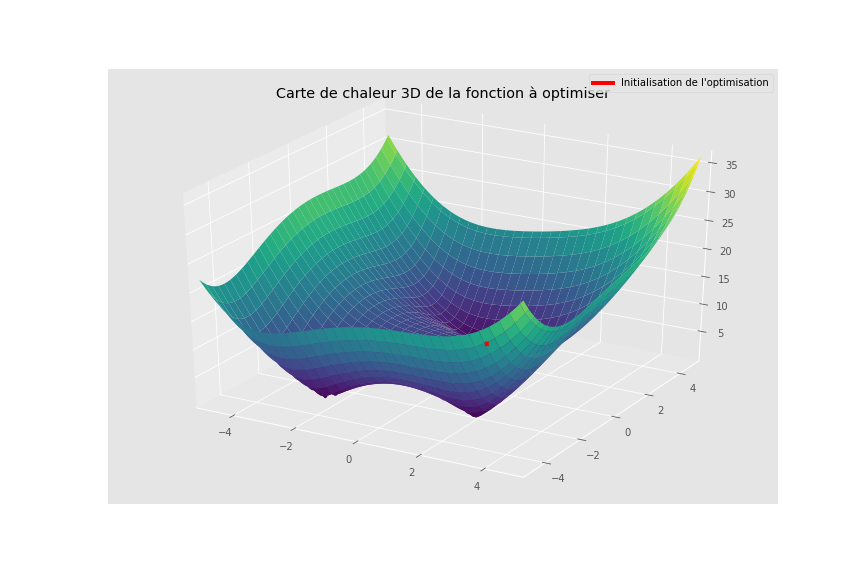

In [4]:
plot_loss_contour(f, three_dim=True, starting=[0, 2],
                  title='Carte de chaleur 3D de la fonction à optimiser')

Dit autrement, nous considérons $f:\mathbb{R}^2\mapsto\mathbb{R}$ définie par $f(x, y)=\sqrt{(x^2+y-2)^2+(x+y^2-7)^2}$. $f$ est continue et infiniment dérivable.

Nous avons en particulier les dérivées partielles suivantes&nbsp;: 


$$\frac{\partial f}{\partial x}(x, y)=\frac{2x^3+x(2y-3)+y^2-7}{\sqrt{(x^2+y-2)^2+(x+y^2-7)^2}}$$

et


$$\frac{\partial f}{\partial y}(x, y)=\frac{x^2+2xy+2y^3-13y-2}{\sqrt{(x^2+y-2)^2+(x+y^2-7)^2}}.$$

Sans hypothèse sur la fonction $f$, celle-ci peut être très difficile à minimiser. Soit $x^{(0)}\in\mathbb{R}^2$, un algorithme permettant de chercher un minimum local en partant de $x^{(0)}$ est la descente de gradient. Ce dernier suppose que nous avons accès aux informations du premier ordre&nbsp;: le gradient $\nabla f(x, y)$. Rappelons que le gradient est le vecteur construit à partir des dérivées partielles $\nabla f (x, y) = [\partial f(x,y)/\partial x, \partial f(x, y)/\partial y]^T$. Ce dernier donne le sens de la plus forte croissance de la fonction $f$. Son opposé donne la plus forte pente. L'idée de l'algorithme de descente de gradient est de suivre la direction donnée par ce dernier par petits pas. On note $\boldsymbol{x}=(x,y)$. Nous avons ainsi&nbsp;:

$$\boldsymbol{x}^{(t+1)}=\boldsymbol{x}^{(t)}-\eta\nabla f(\boldsymbol{x}^{(t)})$$

où $\eta>0$ est justement un paramètre permettant de contrôler la taille du pas.


**<span style='color:blue'> Exercice
</span>** **Donnez le code permettant de calculer le gradient de la fonction précédente (en format vecteur ligne).**
----

In [21]:
def grad(x):
    ####### Complete this part ######## or die ####################
    v = f(x)
    x, y = x
    return np.array([
        (2*x**3+x*(2*y-3)+y**2-7)/v,
        (x**2+2*x*y+2*y**3-13*y-2)/v
    ])
    # g = np.array([((2*x**3)+x*(2*y - 3)+ y**2 -7) / f((x,y)), (x**2 + 2*x*y + 2*y**3 - 13*y -2 )/f((x,y))]).T
    # return g
    ###############################################################



**<span style='color:blue'> Exercice
</span>** **Donnez le code permettant de calculer une itération de l'algorithme de descente de gradient. Attention, on appelle le pas d'optimisation $\eta$ le *learning rate*.**
----


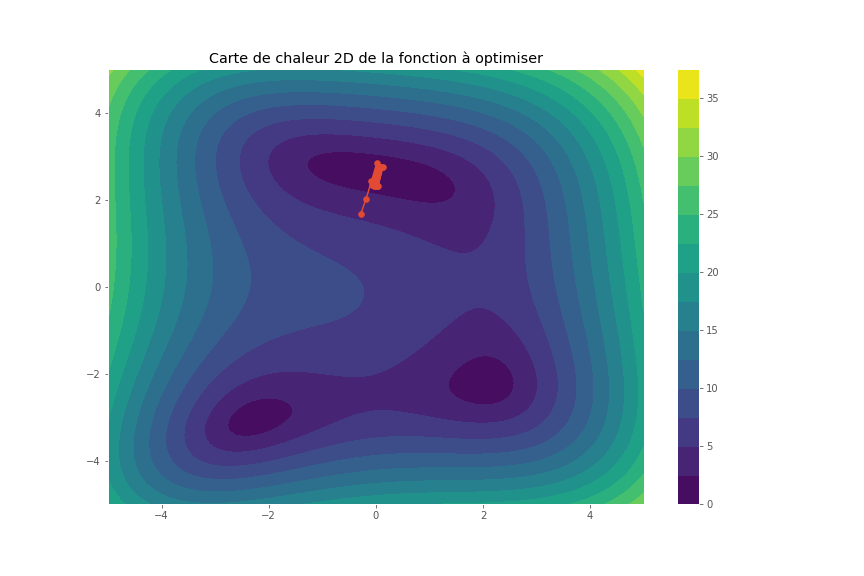

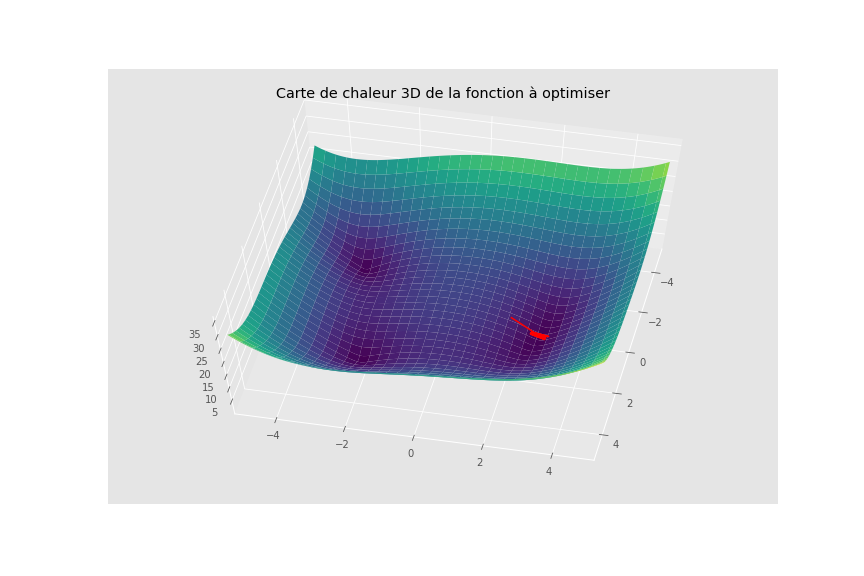

In [22]:
class GradientDescent(object):
    def optimize(self, learning_rate = 0.1, nb_iterations=15, beta=None):
        # beta est notre variable ! 
        # si elle n'est pas fixée on la tire au hasard
        if beta is None:
            beta = np.random.uniform(-2, 2, size=2)

        param_trace = [beta]
        loss_trace = [f(beta)]
        
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            beta = beta - learning_rate * grad(beta)
            ###############################################################
            param_trace.append(beta)
            loss_trace.append(f(beta))
            
        return np.array(param_trace), np.array(loss_trace)
        
gd = GradientDescent()

p, l = gd.optimize()

plot_loss_contour(f, param_trace=p, three_dim=False, 
                  title='Carte de chaleur 2D de la fonction à optimiser')

plot_loss_contour(f, param_trace=np.concatenate([p, l.reshape((l.shape[0], 1))], axis=1), 
                  three_dim=True,  title='Carte de chaleur 3D de la fonction à optimiser')


In [20]:
# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(x, y, learning_rate, iterations):
    clear_output()
    param_trace , loss_trace = gd.optimize(nb_iterations=iterations,
                                           learning_rate=learning_rate, 
                                           beta=np.array([x, y]))
    plot_loss_contour(f, param_trace, figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=0.05, step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=10, min=10, max=500, step=1, continuous_update=False)
)
display(output)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=4.0, min=-4.0), Flo…

Output()

### B. Convergence de la descente de gradient

(ici $\lVert\cdot\rVert=\lVert\cdot\rVert_2$)

Soit $x^\star$ la solution de notre problème d'optimisation&nbsp;:

$$x^\star=\text{argmin}_{x\in\mathbb{R}^d}f(x),$$

alors, $\forall x\in\mathbb{R}^d$, nous avons $f(x)-f(x^\star)\geq 0$. Notons $x^{(k)}$ notre séquence d'itérés (les pas de notre algorithme de descente de gradient). On dira que notre algorithme converge si nous avons :

$$f(x^{(k)})-f(x^\star)\leq g(t),\ \lim_{t\rightarrow \infty}g(t)=0.$$


Dit autrement, si l'écart entre la valeur de notre fonction atteinte par notre algorithme et la solution optimale tend vers $0$, alors on converge. Notez que nous ne mesurons pas $\lVert x^{(k)}-x^\star\rVert$. En effet, s'il existait une infinité de solutions, alors rien ne nous garantit que nous convergerions vers le $x^\star$ choisi.

La convergence de l'algorithme de descente de gradient s'appuie sur une propriété appellée "continuité Lipschitz". On dit qu'une fonction $f:\mathbb{R}^d\rightarrow\mathbb{R}^p$ est Lipschitz si&nbsp;:



$$\lVert f(x_1)-f(x_2)\rVert\leq K\lVert x_1-x_2\rVert,$$

et on appelle $K$ constante Lipchitz.

---

**<span style='color:blue'> Exercice 
</span>** 
**Soit la fonction $f(x)=x^2$ sur $\mathbb{R}$. Montrer que $f$ n'est pas Lipschitz mais que $f^\prime$ l'est.**

----



---



**<span style='color:blue'> Proposition
</span>** 
Soit $f:\mathbb{R}^d\rightarrow\mathbb{R}$ notre fonction à optimiser, convexe et différentiable, $x^\star$ une solution du problème et supposant $\nabla f$ Lipchitz de constante $L$ ($\lVert\nabla f(x_1)-\nabla f(x_2)\rVert\leq L\lVert x_1-x_2\rVert$). Fixons le pas d'optimisation $\eta \leq 1/L$. Alors, nous avons :




$$f(x^{(k)})-f(x^\star)\leq \frac{\lVert x^{(0)}-x^\star\rVert^2}{2 k\eta},$$

où, le numérateur étant constant, la partie à droite converge vers $0$ à une vitesse proportionnelle à $1/k$.




----


**<span style='color:green'> Preuve
</span>** 
Soit $x_1, x_2\in\mathbb{R}^d$ et notons $h=x_1-x_2$. Nous avons :

$$\begin{aligned}
f(x_2+h)&=f(x_2)+\int_0^1\langle \nabla f(x_2+th), h\rangle dt\\
\Leftrightarrow f(x_2+h)-f(x_2)&=\int_0^1\langle \nabla f(x_2+th), h\rangle dt\\
\Leftrightarrow f(x_2+h)-f(x_2)-\int_0^1\langle \nabla f(x_2), h\rangle dt&=\int_0^1\langle \nabla f(x_2+th), h\rangle dt-\int_0^1\langle \nabla f(x_2), h\rangle dt\\
\Leftrightarrow f(x_2+h)-f(x_2)-\langle \nabla f(x_2), h\rangle&=\int_0^1\langle \nabla f(x_2+th)-\nabla f(x_2), h\rangle dt.
\end{aligned}$$

Considérons la partie dans l'intégrale et appliquons [Cauchy-Schwartz](https://fr.wikipedia.org/wiki/Inégalité_de_Cauchy-Schwarz) et utilisons la continuité Lipschitz 

$$\begin{aligned}
\langle f(x_2+th)-\nabla f(x_2), h\rangle\leq \lVert f(x_2+th)-\nabla f(x_2)\rVert\lVert h\rVert \leq Lt\lVert h\rVert^2.
\end{aligned}$$

Nous avons ainsi:

$$\begin{aligned}
\int_0^1\langle f(x_2+th)-\nabla f(x_2), h\rangle dt&\leq \int_0^1 Lt\lVert h\rVert^2dt = \frac{L}{2}\lVert h\rVert^2.
\end{aligned}$$

En combinant le tout, nous avons (1) :

$$f(x_2+h)-f(x_2)-\langle \nabla f(x_2), h\rangle\leq \frac{L}{2}\lVert h\rVert^2\Leftrightarrow f(x_1)\leq f(x_2)+\langle \nabla f(x_2), x_1-x_2\rangle+\frac{L}{2}\lVert x_1-x_2\rVert^2$$

Reprenons notre formule et remplaçons $x^{(k+1)}=x_1$ et $x^{(k)}=x_2$. Nous avons bien sûr $x^{(k+1)}=x^{(k)}-\eta\nabla f(x^{(k)})$. Nous avons&nbsp;:

$$\begin{aligned}
f(x^{(k+1)})&\leq f(x^{(k)})+\langle \nabla f(x^{(k)}), x^{(k+1)}-x^{(k)}\rangle+\frac{L}{2}\lVert x^{(k+1)}-x^{(k)}\rVert^2\\
&=f(x^{(k)})+\langle \nabla f(x^{(k)}), x^{(k)}-\eta\nabla f(x^{(k)})-x^{(k)}\rangle+\frac{L}{2}\lVert x^{(k)}-\eta\nabla f(x^{(k)})-x^{(k)}\rVert^2\\
&=f(x^{(k)})-\eta\langle \nabla f(x^{(k)}), \nabla f(x^{(k)})\rangle+\frac{L\eta^2}{2}\lVert\nabla f(x^{(k)})\rVert^2\\
&=f(x^{(k)})-\eta\lVert \nabla f(x^{(k)})\rVert^2+\frac{L\eta^2}{2}\lVert\nabla f(x^{(k)})\rVert^2\\
&=f(x^{(k)})-\eta(1-\frac{L\eta}{2})\lVert\nabla f(x^{(k)})\rVert^2
\end{aligned}$$

Rappelons que par hypothèse, nous avons $\eta\leq 1/L$. Cela implique que&nbsp;:

$$-(1-\frac{L\eta}{2})=\frac{1}{2}L\eta-1\leq \frac{1}{2}-1=-\frac{1}{2}.$$ 

Ainsi, nous avons (2)&nbsp;:

$$\begin{aligned}
f(x^{(k+1)})&\leq f(x^{(k)})-\frac{\eta}{2}\lVert\nabla f(x^{(k)})\rVert^2.
\end{aligned}$$

On remarque ainsi que le pas de descente de gradient ne peut QUE décroître la fonction objectif à moins que le gradient soit nul et l'algorithme reste constant. Cela est dû à la continuité Lipschitz et au choix approprié du pas $\eta$.

Rappelons que $f$ est convexe impliquant les deux inégalités suivantes&nbsp;:

$$\begin{aligned}
f(x^\star)&\geq f(x)+\langle \nabla f(x), x^\star-x\rangle\\
f(x)&\leq f(x^\star)+\langle \nabla f(x), x-x^\star\rangle\text{ (en multipliant par -1).}
\end{aligned}$$

En récupérant l'inégalité (2), nous avons&nbsp;:


$$\begin{aligned}
f(x^{(k+1)})&\leq f(x^{(k)})-\frac{\eta}{2}\lVert\nabla f(x^{(k)})\rVert^2\\
&\leq f(x^\star)+\langle \nabla f(x^{(k)}), x^{(k)}-x^\star\rangle-\frac{\eta}{2}\lVert\nabla f(x^{(k)})\rVert^2\\
\Leftrightarrow f(x^{(k+1)}) - f(x^\star) &\leq \frac{1}{2\eta}\big(2\eta\langle \nabla f(x^{(k)}), x^{(k)}-x^\star\rangle-\eta^2\lVert\nabla f(x^{(k)})\rVert^2\big)\\
\Leftrightarrow f(x^{(k+1)}) - f(x^\star) &\leq \frac{1}{2\eta}\big(2\eta\langle \nabla f(x^{(k)}), x^{(k)}-x^\star\rangle-\eta^2\lVert\nabla f(x^{(k)})\rVert^2-\lVert x^{(k)}-x^\star\rVert^2+\lVert x^{(k)}-x^\star\rVert^2\big)\\
&=\frac{1}{2\eta}\big(\lVert x^{(k)}-x^\star\rVert^2-\lVert x^{(k)}-\eta\nabla f(x^{(k)})-x^\star\rVert^2\big)\\
&=\frac{1}{2\eta}\big(\lVert x^{(k)}-x^\star\rVert^2-\lVert x^{(k+1)}-x^\star\rVert^2\big)
\end{aligned}$$

L'inégalité précédente est vraie pour tout $k\in\mathbb{N}$. Nous avons donc aussi l'inégalité suivante&nbsp;:

$$\begin{aligned}
\sum_{t=0}^k f(x^{(t+1)}) - f(x^\star) &\leq \sum_{t=0}^k\frac{1}{2\eta}\big(\lVert x^{(t)}-x^\star\rVert^2-\lVert x^{(t+1)}-x^\star\rVert^2\big)\\
&=\frac{1}{2\eta}\big(\lVert x^{(0)}-x^\star\rVert^2-\lVert x^{(k+1)}-x^\star\rVert^2\big)\text{ (les termes de la somme se téléscopent)}\\
&\leq \frac{1}{2\eta}\lVert x^{(0)}-x^\star\rVert^2
\end{aligned}$$

Nous avons ainsi&nbsp;:

$$\begin{aligned}
\sum_t f(x^{(k+1)}-f(x^\star)&\leq \sum_t f(x^{(t+1)}) - f(x^\star)\text{ (GD ne peut que améliorer la fonction objectif)}\\
\Leftrightarrow f(x^{(k+1)}-f(x^\star)&\leq \frac{1}{k+1}\sum_t  f(x^{(t+1)}) - f(x^\star)\leq \frac{\lVert x^{(0)}-x^\star\rVert^2}{2\eta(k+1)},
\end{aligned}$$

ce qui conclut la preuve.
----

## II. La descente de gradient à pas optimal

Dans le scénario précédent, nous avons du fixer un pas d'optimisation $\eta$ arbitraire. Ce dernier doit être suffisament petit pour garantir que l'algorithme converge et suffisamment grand pour que l'optimisation se fasse. Il est possible de définir une notion de pas d'optimisation optimal. Cependant, celle-ci est souvent intractable en pratique (trouver le pas est plus couteux que l'optimisation initiale). Dans certains cas, nous pouvons néanmoins le déterminer. C'est ce que nous allons faire ici. Considérons maintenant la fonction suivante&nbsp;:

In [23]:
A = np.array([[1, 0], [0, 2]])
b = np.array([[2], [1]])

def f(x):
    if type(x) is np.ndarray:
        x = x.tolist()
    return (np.dot(np.dot(A, x).T, x)*0.5+np.dot(b.T, x))[0]

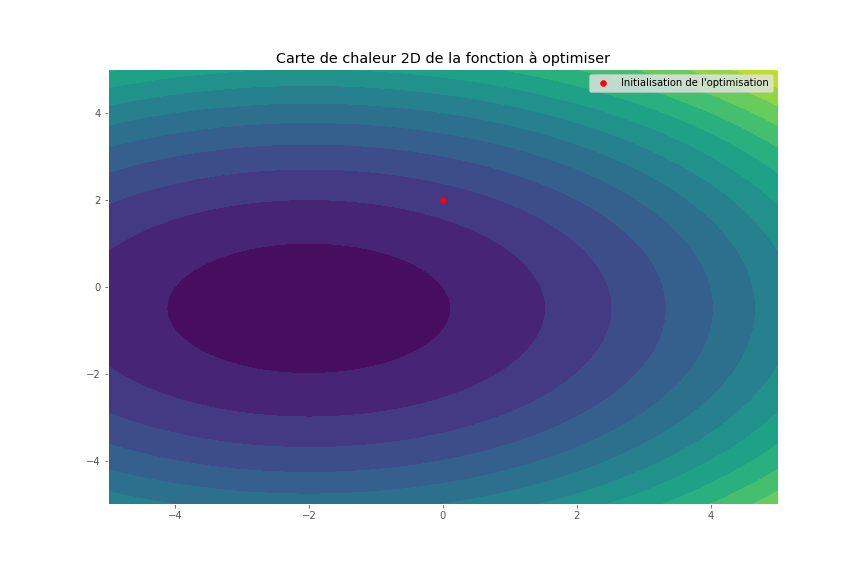

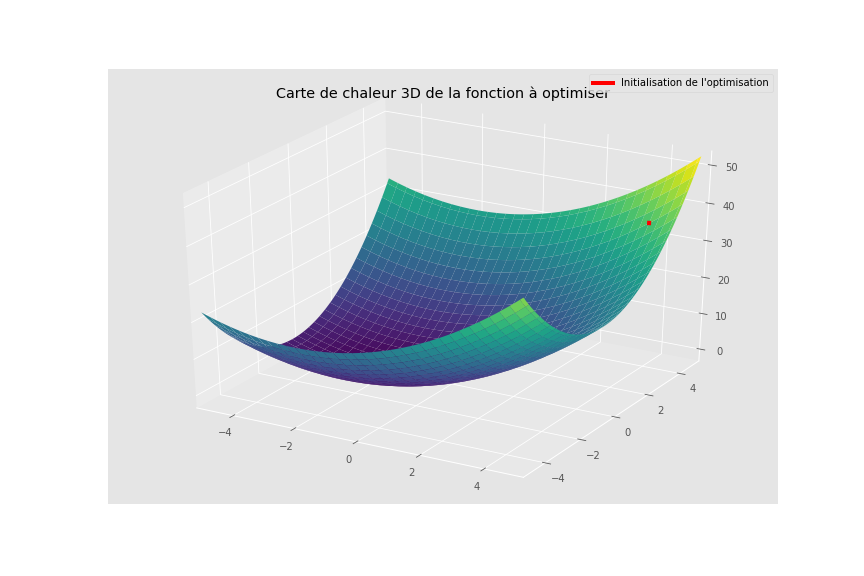

In [24]:
plot_loss_contour(f, three_dim=False, starting=[0, 2], 
                  title='Carte de chaleur 2D de la fonction à optimiser')
plot_loss_contour(f, three_dim=True, starting=[4, 4], 
                  title='Carte de chaleur 3D de la fonction à optimiser')

L'algorithme de descente de gradient nous permet d'avancer dans la bonne direction. Cependant, le choix du pas $\eta$ peut nous sembler insuffisant. 

Soit $\boldsymbol{\nu}=[x, y]^T$, la direction d'optimisation $\boldsymbol{d}^{(t)}=-\nabla f(\boldsymbol{\nu}^{(t)})$ et la fonction $\gamma:t\mapsto f(\boldsymbol{\nu}^{(t)}+t\boldsymbol{d}^{(t)})$. La valeur de $t$ qui minimise la fonction $\gamma$ est un pas optimal pour une minimisation dans la direction du gradient. Sans contrainte particulière sur la fonction $f$, $\gamma$ pourrait admettre un certain nombre de points critiques de natures et de valeurs différentes.

Les points critiques sont les points d'annulation de la dérivée : $\{t\in\mathbb{R}:\ \gamma^\prime(t)=0\}$. On obtient assez facilement la dérivée de la manière suivante&nbsp;:

$$\gamma^\prime(t)=\frac{\partial f}{\partial x}(\boldsymbol{\nu}^{(t)}+t\boldsymbol{d}^{(t)})\frac{\partial f}{\partial x}(\boldsymbol{\nu}^{(t)})+\frac{\partial f}{\partial y}(\boldsymbol{\nu}^{(t)}+t\boldsymbol{d}^{(t)})\frac{\partial f}{\partial y}(\boldsymbol{\nu}^{(t)})$$

On remarque que résoudre cette équation est rapidement problématique et nécessite l'utilisation d'un autre algorithme de descente de gradient. En réalité, il y a grossièrement deux possibilités :
1. On peut trouver une valeur $t$ analytiquement et c'est le choix qu'on doit faire,
2. Il n'est pas possible de calculer $t$ et on doit le calculer numériquement. Cependant, si on doit le calculer numériquement, alors, il devient nécessaire de calculer le gradient à chaque étape, et dans ce cas, pourquoi ne pas juste se déplacer dans l'espace des paramètres avec notre vecteur $\boldsymbol{[x, y]}$ ce qui nous donnerait une meilleure direction dans l'espace des paramètres...


Il se trouve que la fonction définie ci-dessus est : $f(\boldsymbol{x})=\frac{1}{2}\langle Ax, x\rangle+\langle b, x\rangle$ où&nbsp;:


$$A=\begin{bmatrix} 1& 0\\ 0& 2\end{bmatrix}$$

est symétrique définie positive et 


$$b=\begin{bmatrix}2\\1\end{bmatrix}$$

Notons 

$$\begin{aligned}
f(\boldsymbol{x}+t\boldsymbol{d})&=\frac{1}{2}\langle A(x+t\boldsymbol{d}), x+t\boldsymbol{d}\rangle+\langle b, x+t\boldsymbol{d}\rangle\\
&=\frac{1}{2}(\langle A\boldsymbol{x},\boldsymbol{x}\rangle+t\langle A\boldsymbol{d},\boldsymbol{x}\rangle+t\langle A\boldsymbol{x},\boldsymbol{d}\rangle+t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle)+\langle \boldsymbol{b},\boldsymbol{x}\rangle+t\langle \boldsymbol{b},\boldsymbol{d}\rangle\\
&=f(\boldsymbol{x})+\frac{1}{2} t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle+t\langle A\boldsymbol{x}+\boldsymbol{b},\boldsymbol{d}\rangle
\end{aligned}$$

Notons de plus que $\partial f(\boldsymbol{x})/\partial \boldsymbol{x}=A\boldsymbol{x}+\boldsymbol{b}=-\boldsymbol{d}$. Nous avons donc&nbsp;:

\begin{equation}
f(\boldsymbol{x}+t\boldsymbol{d})=f(\boldsymbol{x})+\frac{1}{2} t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle-t\langle \boldsymbol{d},\boldsymbol{d}\rangle=f(\boldsymbol{x})+\frac{1}{2} t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle-\left\lVert\boldsymbol{d}\right\lVert^2 t
\end{equation}

La direction $\boldsymbol{d}=-\nabla f(\boldsymbol{x})$ est celle qui indique la plus forte pente. La variable $t$ recherchée indique la taille du pas que l'on souhaite faire. Pour cela, nous devons chercher les points critiques de la fonction $\gamma(t)=f(\boldsymbol{x}+t\boldsymbol{d})$ qui sont donnés en recherchant les points d'annulation de la dérivée. De plus, $A$ (la Hessienne) étant définie positive, nous savons que ces points critiques seront des minimums. Nous avons donc&nbsp;:

$$\frac{\partial \gamma}{\partial t}(t)=t\langle A\boldsymbol{d}, \boldsymbol{d}\rangle - \left\lVert\boldsymbol{d}\right\lVert^2=0$$

Et le point critique est donné par&nbsp;:

$$t=\frac{\left\lVert\boldsymbol{d}\right\lVert^2}{\langle A\boldsymbol{d}, \boldsymbol{d}\rangle}$$

**<span style='color:blue'> Exercice
</span>** **Donnez le code permettant de calculer le gradient (i.e. la direction d'optimisation).**
----

In [25]:
def grad(x):
    ####### Complete this part ######## or die ####################
    return np.dot(A,x)+b
    ###############################################################


**<span style='color:blue'> Exercice
</span>** **Donnez le code permettant de calculer une itération de l'algorithme de descente de gradient avec un pas optimal.**
----

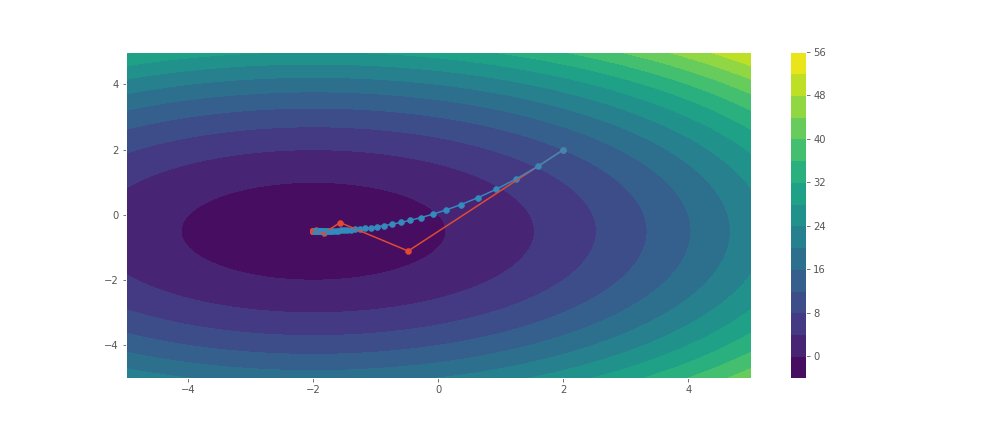

In [26]:
class OptimalStepGradientDescent(object):
    def optimize(self, learning_rate=0.1, nb_iterations=15, beta=None):
        if beta is None:
            beta = np.random.uniform(-2, 2, size=(2, 1))
        else:
            beta = beta.reshape((2, 1))
            
        beta2 = beta.copy()

        param_trace = [beta]
        param_trace2 = [beta2]
        loss_trace = [f(beta)]
        loss_trace2 = [f(beta2)]
        it = 0
        stop = False
        
        for i in range(nb_iterations):
            d = -grad(beta)
            if d[0, 0] == d[1, 0] == 0.:
                stop = True
            else:
                ####### Complete this part ######## or die ####################
                t = np.linalg.norm(d)**2/np.dot(np.dot(A,d).T, d)
                beta = beta + t[0,0] * d
                ###############################################################
                
                param_trace.append(beta)
                loss_trace.append(f(beta))
            
            # cette partie du code permet de calculer le gradient classique
            # afin que nous puissions le comparer avec la descente de gradient
            # à pas optimal.
            beta2 = beta2 - learning_rate * grad(beta2)
            param_trace2.append(beta2)
            loss_trace2.append(f(beta2))
            it += 1
        return (np.array(param_trace), np.array(loss_trace), 
                np.array(param_trace2), np.array(loss_trace2))
        
gd = OptimalStepGradientDescent()

p1, _, p2, _ = gd.optimize(learning_rate=0.1, nb_iterations=50, beta=np.array([2, 2]))

plot_loss_contour(f, (p1, p2), figsize=(14.0, 6.0))


In [27]:
# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(learning_rate, x, y, iterations):
    clear_output()
    p1, l1, p2, l2 = gd.optimize(learning_rate=learning_rate, nb_iterations=iterations,
                                           beta=np.array([x, y]))
    plot_loss_contour(f, (p1, p2), figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=1., step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=1, min=1, max=20, step=1, continuous_update=False)
)
display(output)


interactive(children=(FloatSlider(value=1e-05, continuous_update=False, description='learning_rate', max=1.0, …

Output()

--- 

**<span style='color:blue'> Exercice (dur)
</span>** 
**Soit $A\in\mathcal{S}_n(\mathbb{R})$, $b\in\mathbb{R}^n$. Montrer que notre fonction&nbsp;:**

$$\begin{aligned}f:\mathbb{R}^n&\rightarrow \mathbb{R}\\
x&\mapsto \frac{1}{2}x^TAx-b^Tx\end{aligned}$$

**admet un *unique minimum* si, et seulement si $\text{Sp}(A)\subset\mathbb{R}^+$ et $b\in\text{Im}(A)$.**

----
**<span style='color:orange'> Indices
</span>** Rappelons que $\mathcal{S}_n(\mathbb{R})$ représente les matrices réelles symétriques de taille $n\times n$, $\text{Sp}(A)$ est le spectre de $A$ (i.e. ses valeurs propres) et $\text{Im}(A)$, l'image de $A$.
----




## III. La descente de gradient stochastique (SGD)

En *machine learning*, la fonction que nous souhaitons optimiser a la forme suivante&nbsp;:

$$J(\theta)=\frac{1}{n}\sum_{i=1}^n \ell(h_\theta(x_i), y_i),$$

où $h_\theta$ est une fonction paramétrisée par $\theta$ et $\ell$ une fonction qui quantifie l'erreur élémentaire de notre modèle pour un point donné. La descente de gradient nécessite l'évaluation du gradient de cette dernière&nbsp;:

$$\nabla J(\theta)=\frac{1}{n}\sum_{i=1}^n \nabla \ell(h_\theta(x_i), y_i).$$

Si $n$ est grand, alors l'évaluation du gradient est couteuse. On pourrait même imaginer un scénario où la collecte des données s'effectue en continue et où $n\rightarrow\infty$. Le calcul du gradient serait alors tout simplement impossible. La solution consiste à ne calculer à chaque itération le gradient que sur un unique point de notre jeu de données&nbsp;:

$$\hat{\nabla}J(\theta)=\nabla \ell(h_\theta(x_i), y_i),\ i\in\{1, \ldots, n\}.$$

**<span style='color:blue'> Exercice
</span>** **Montrer que l'espérance du gradient sur un point ou sur tout le jeu de données est la même.**

----


Ainsi, l'estimation du gradient est $n$ fois plus rapide que sur le jeu de données complet.


Une situation intermédiaire consiste à calculer le gradient sur un batch de données de taille $b$ (i.e. *batch size*)&nbsp;:

$$\hat{\nabla}J(\theta)=\frac{1}{b}\sum_{i\in I_b}\nabla \ell(h_\theta(x_i), y_i),\ I_b\subseteq\{1, \ldots, n\},\ |I_b|=b.$$

**<span style='color:blue'> Exercice
</span>** **Montrer que l'espérance du gradient calculé sur un *batch* ou sur tout le jeu de données est la même.**
----


Quelque soit la stratégie, la stratégie peut être avec ou sans remise. Les approches de type *deep learning* préfèrent souvent celle sans remise. Lorsque tout le jeu de donnée a été vu, on dit qu'il s'est passé une *epoch*. Et lorsqu'une *epoch* se termine, le jeu de données peut être re-parcouru tel quel ou mélangé avant d'être re-parcouru. La seconde stratégie est souvent préférée.


In [28]:
import numpy as np

n = 100

X = np.random.randn(n, 2)
y = np.random.randn(n)

**<span style='color:blue'> Exercice
</span>** **Complétez le code suivant afin de pouvoir jouer sur la taille des batchs dans le calcul du gradient.**
----

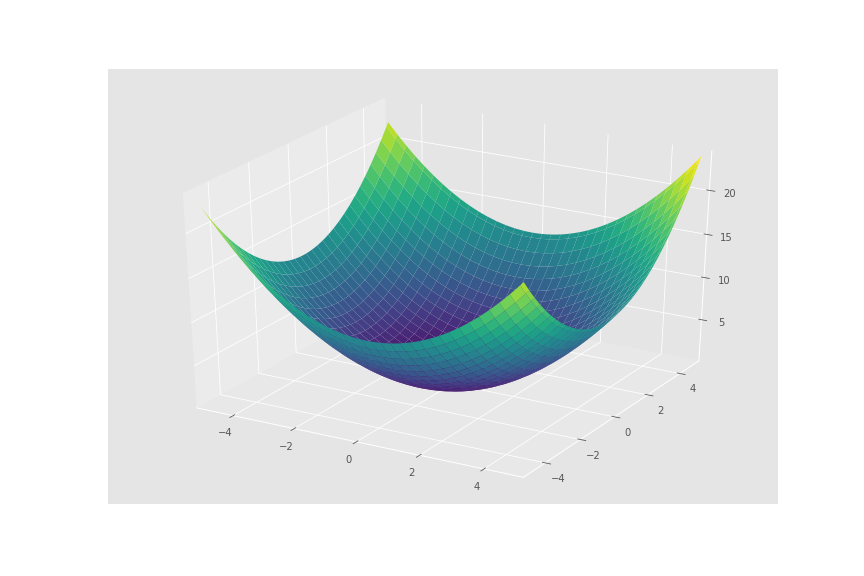

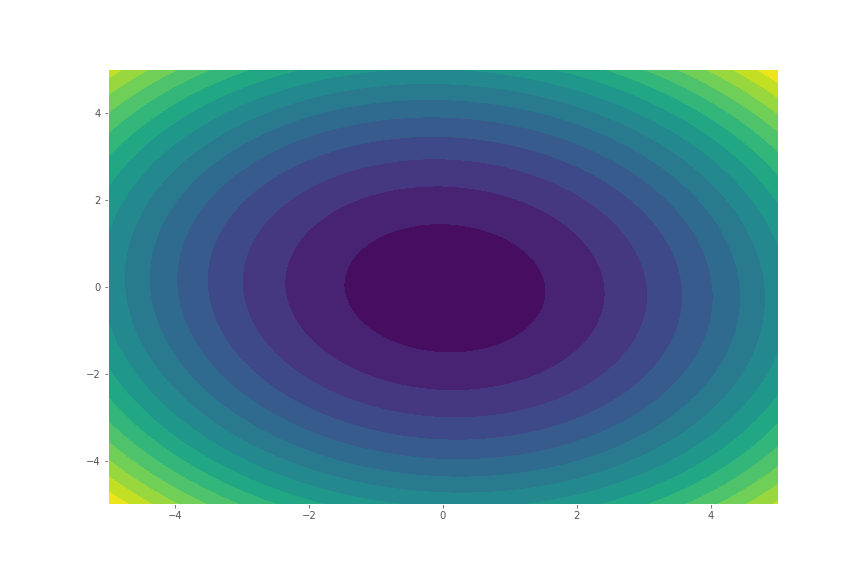

In [31]:
####### Complete this part ######## or die ####################
class LeastSquare(object):
    def __init__(self, X, y):
        self.X=X
        self.y = LeastSquare._format_ndarray(y)
        self.idx = np.array([i for i in range(self.X.shape[0])])
        self._pos = 0
        
    def _format_ndarray(arr):
        arr = np.array(arr) if type(arr) is not np.ndarray else arr
        return arr.reshape((arr.shape[0], 1)) if len(arr.shape) == 1 else arr
    
    def __call__(self, beta):
        # Cette méthode calcule la valeur de la fonction
        beta = LeastSquare._format_ndarray(beta)
        prediction = np.dot(beta.T, self.X.T)
        errors = np.power(prediction - self.y.T, 2)
        val = errors.sum()/(2*self.X.shape[0])
        
        return val
    
    def _shuffle(self):
        np.random.shuffle(self.idx)
    
    def grad(self, beta, batch_size=-1):
        batch_size = self.X.shape[0] if batch_size == -1 else batch_size
        idx = self.idx[self._pos:self._pos+batch_size]

        self._pos = (self._pos+batch_size) % self.X.shape[0]
        if self._pos == 0:
            self._shuffle()
            
        X, y = self.X[idx], self.y[idx]

        beta = LeastSquare._format_ndarray(beta)
        
        grad = (np.dot(np.dot(X.T, X), beta)-np.dot(X.T, y))/X.shape[0]
        return grad
    
    def optimize(self, lr=0.1, nb_iterations=10, batch_size=-1, beta=None):
        # beta est notre variable ! 
        # si elle n'est pas fixée on la tire au hasard
        if beta is None:
            beta = np.random.uniform(-2, 2, size=2)

        param_trace = [beta]
        loss_trace = [self(beta)]
        
        for i in range(nb_iterations):
            beta = beta - lr * self.grad(beta, batch_size).ravel()

            param_trace.append(beta)
            loss_trace.append(self(beta))
        return np.array(param_trace), np.array(loss_trace)
    
###############################################################
l = LeastSquare(X, y)
plot_loss_contour(l, three_dim=True)
plot_loss_contour(l, three_dim=False)


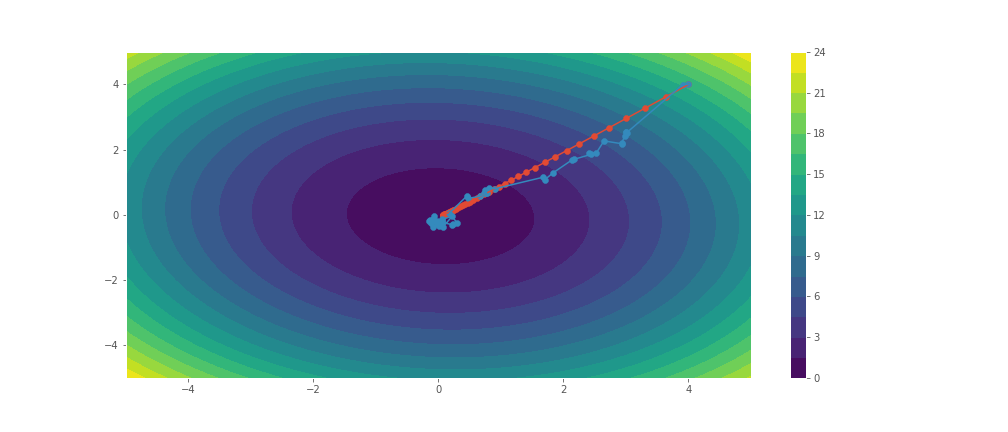

In [32]:
gd = LeastSquare(X, y)
sgd = LeastSquare(X, y)

p1, l1 = gd.optimize(
    lr=0.1, nb_iterations=50, beta=np.array([4, 4])
)
p2, l2 = sgd.optimize(
    lr=0.1, nb_iterations=50, 
    beta=np.array([4, 4]), batch_size=1
)
plot_loss_contour(gd, (p1, p2), figsize=(14.0, 6.0))


In [ ]:
# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()



@output.capture()
def interactive_gradient_descent(learning_rate, x, y, iterations, batch_size):
    clear_output()
    p1, l1 = gd.optimize(lr=learning_rate, nb_iterations=iterations, beta=np.array([x, y]))
    p2, l2 = sgd.optimize(
        lr=learning_rate, nb_iterations=iterations, 
        beta=np.array([x, y]), batch_size=batch_size)
    plot_loss_contour(gd, (p1, p2), figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=1., step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=1, min=1, max=20, step=1, continuous_update=False),
                 batch_size=widgets.IntSlider(value=1, min=1, max=n, step=1, continuous_update=False)
)
display(output)


## IV. La méthode de Newton

### Introduction
L'élément de base de la méthode de Newton est le développement limité d'une fonction $f$ en $x_0$. Soit $f\in C^n(\mathbb{R})$ une fonction $n$ fois dérivable de dérivée $n^{eme}$ continue de $\mathbb{R}$ dans $\mathbb{R}$, son développement limité à l'ordre $n$ est donné par la formule suivante&nbsp; :

$$f(x)=\sum_{i=1}^n \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n+o\big((x-x_0)^n\big)$$

Ainsi, la tangente à notre fonction au point $x_0$, ou approximation linéaire de notre fonction en $x_0$, est donnée par&nbsp;:



$$f(x)\approx f(x_0)+f^\prime(x_0)(x-x_0)$$

et l'approximation à l'ordre $2$ par&nbsp;:

$$f(x)\approx f(x_0)+f^\prime(x_0)(x-x_0)+\frac{f^{\prime\prime}(x_0)}{2}(x-x_0)^2$$


Ces idées se généralisent à des fonctions $f:\mathbb{R}^n\mapsto\mathbb{R}$&nbsp;:

$$f(x)\approx f(x_0)+\langle \nabla f(x_0), x-x_0\rangle + \frac{1}{2} (x-x_0)^TH_f(x-x_0)$$


### La méthode
Soit $f:\mathbb{R}\mapsto\mathbb{R}$ une fonction deux fois dérivables de dérivée seconde continue, l'objectif de la méthode de Newton est de minimiser $f$&nbsp;:

$$\min_{x\in\mathbb{R}}f(x)$$

Supposons de plus $f$ strictement convexe. Cette minimisation est séquentielle est produit une suite d'itérés $\{x_0, x_1, ..., x_k\}$ où $x_0$ est notre point de départ. chaque itéré se rapproche un peu plus du minimiseur recherche $x^\star$.

À chaque itérée, l'approximation à l'ordre $2$ de $f$ est elle-même une fonction (strictement) convexe et coercive. Elle admet donc un minimum que l'on peut trouver en annulant la dérivée&nbsp;:

$$f(x_k+t)\approx f(x_k)+f^\prime(x_k)t+\frac{f^{\prime\prime}(x_k)}{2}t^2$$

On a donc&nbsp;:

$$\frac{d}{dt}(f(x_k)+f^\prime(x_k)t+\frac{f^{\prime\prime}(x_k)}{2}t^2)=f^\prime(x_k)+f^{\prime\prime}(x_k)t=0\Leftrightarrow t=-\frac{f^\prime(x_k)}{f^{\prime\prime}(x_k)}$$

Ce qui nous permet de fixer l'itéré suivant&nbsp;: $x_{k+1}=x_k-f^\prime(x_k)/f^{\prime\prime}(x_k)$.

Cette méthode se généralise bien sûr à des fonctions à plusieurs variables comme nous allons le voir lors d'une autre section.

Considérons la fonction suivante&nbsp;:

In [33]:
def f(x):
    return np.power(x-0.85, 2) + 12+np.power(x, 4)+np.exp(x)

In [34]:
x_start = -2

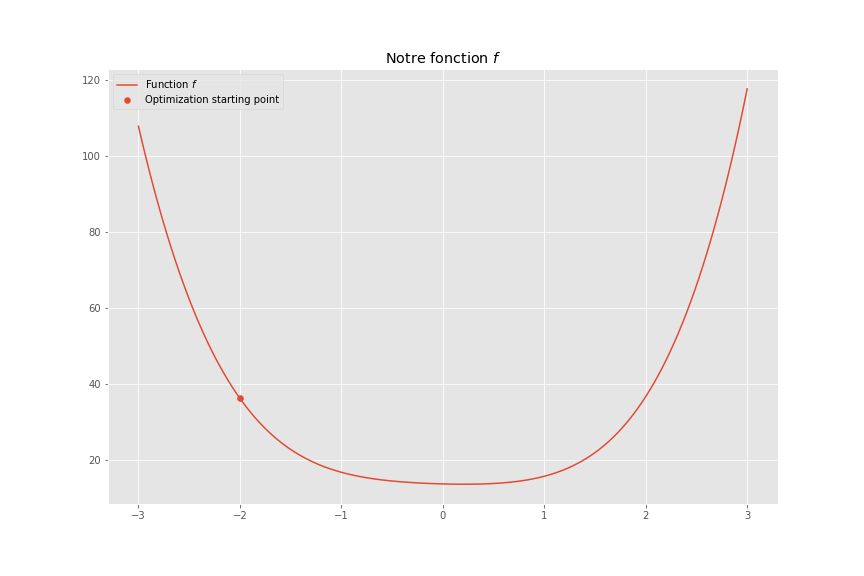

In [35]:
def plot_curve(x_start, optimization_steps=None):
    x = np.linspace(-3, 3, 301)
    plt.figure(figsize=(12.0, 8.0))
    plt.plot(x, f(x), label='Function $f$')
    plt.scatter([x_start], f(x_start), label='Optimization starting point')
    if optimization_steps is not None:
        plt.scatter(optimization_steps[:, 0], optimization_steps[:, 1], 
                    color='blue', label='Optimization steps')
    plt.title('Notre fonction $f$')
    plt.legend()
    plt.show()
plot_curve(x_start)

**<span style='color:blue'> Exercice
</span>** **Donnez le code permettant de calculer une itération de la méthode d'optimisation de Newton. Jouez ensuite avec l'affichage interactif.**

----

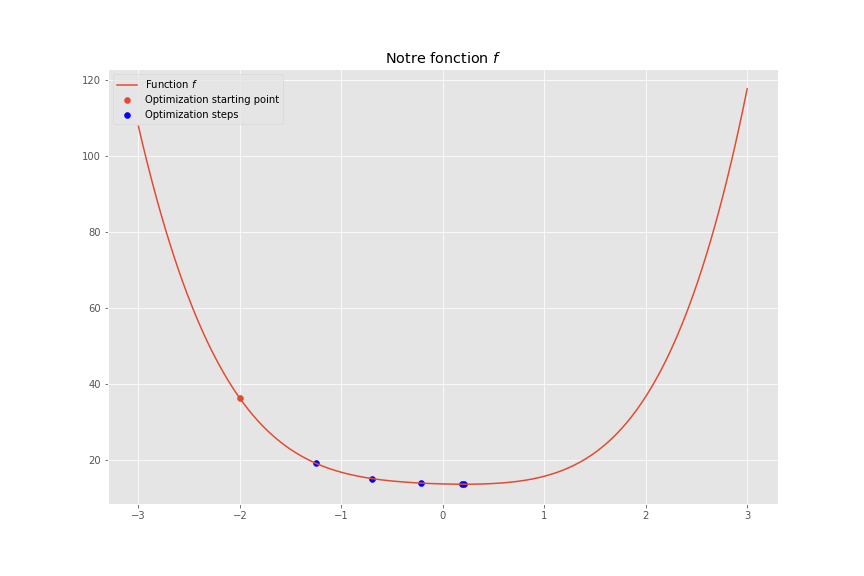

In [37]:
def f_prime(x):
    return 2*x-1.7+4*x**3+np.exp(x)

def f_prime_prime(x):
    return 2+12*x**2+np.exp(x)

class NewtonMethod(object):
    def optimize(self, x_start, nb_iterations=15):
        
        

        optimization_steps = []
        x_t = x_start
        
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            x_t = x_t - f_prime(x_t) / f_prime_prime(x_t)
            ###############################################################
            
            optimization_steps.append([x_t, f(x_t)])
            
        return np.array(optimization_steps)
        
newton = NewtonMethod()

optimization_steps = newton.optimize(-2, nb_iterations=5)
plot_curve(-2, optimization_steps)


In [ ]:
# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(x, iterations):
    clear_output()
    optimization_steps = newton.optimize(x, nb_iterations=iterations)
    plot_curve(x, optimization_steps)
    
widgets.interact(interactive_gradient_descent,
                 x=widgets.FloatSlider(value=-3, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=1, min=1, max=10, step=1, continuous_update=False)
)
display(output)


## V. La descente de coordonnées

La descente de coordonnées ou *coordinate descent* consiste à optimiser une fonction multivariée variable par variable. Soit $f:\mathbb{R}^d\mapsto\mathbb{R}$ et le problème d'optimisation suivant&nbsp;:

$$x^\star=\text{argmin}_{x\in\mathbb{R}^d}f(x).$$

Contrairement à la descente de gradient classique, ici, lors d'une étape d'optimisation, une unique variable est mise à jour à la fois : 

$$x^{(t)}_i=\text{argmin}_{x\in\mathbb{R}}f(x^{(t)}_1,\ldots, x_{i-1}^{(t)}, x, x_{i+1}^{(t-1)}, \ldots, x_d^{(t-1)}).$$

Considérons la fonction à deux variables suivantes&nbsp;: $f(x, y)=5x^2-6xy+5y^2$.

In [ ]:
def f(x):
    return 5*np.power(x[0], 2)-6*x[0]*x[1]+5*np.power(x[1], 2)

In [ ]:
plot_loss_contour(f, three_dim=False, starting=[0, 2], 
                  title='Carte de chaleur 2D de la fonction à optimiser')

Considérons $g_y(x)=f(x, y)$ comme une fonction de $x$ uniquement (i.e. $y$ est fixé) et dérivons&nbsp;:

$$g_y^\prime(x)=10x-6y.$$

Ainsi, l'itéré suivant pour la variable $x$ s'obtient de la manière suivante&nbsp;: $x^{(t)}=x^{(t-1)}-\eta g_y^\prime(x^{(t-1)})$. Le même raisonement s'étend de manière totalement symétrique pour obtenir l'itéré de la variable $y$ (remarquez que $f(x, y)= f(y, x)$).

**<span style='color:blue'> Exercice
</span>** 
**Donnez le code permettant de calculer une itération de la méthode *coordinate descent*.**

----

In [ ]:
class CoordinateDescent(object):
    def optimize(self, x_start, nb_iterations=15, learning_rate=0.01):
        optimization_steps = [np.copy(x_start)]
        x_t = x_start
        
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            x_t[0]=x_t[0]-learning_rate*(10*x_t[0]-6*x_t[1])
            ###############################################################

            optimization_steps.append(np.copy(x_t))
            
            ####### Complete this part ######## or die ####################
            x_t[1]=x_t[1]-learning_rate*(10*x_t[1]-6*x_t[0])
            ###############################################################
            
            optimization_steps.append(np.copy(x_t))

            
        return np.array(optimization_steps)
        
coordinate = CoordinateDescent()

param_trace = coordinate.optimize(
    x_start=np.array([2., 2.]), 
    nb_iterations=20, 
    learning_rate=0.1
)
plot_loss_contour(f, param_trace, figsize=(14.0, 6.0))


In [ ]:

# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(learning_rate, x, y, iterations):
    clear_output()
    param_trace = coordinate.optimize(x_start=np.array([x, y]),
                                      nb_iterations=iterations,
                                      learning_rate=learning_rate)
    plot_loss_contour(f, param_trace, figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=0.1, step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=-2, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=-2, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=1, min=1, max=20, step=1, continuous_update=False)
)
display(output)


## VI. Optimisation sous contrainte (en plus ?)

### A. Introduction aux multiplicateurs de Lagrange
Il est parfois nécessaire d'introduire certaines contraintes que notre solution doit satisfaire. Par exemple, on peut vouloir minimiser une fonction de coût $\mathcal{L}$ et en même temps vouloir contraindre la solution $\hat{\beta}$ à avoir une norme de taille fixe.

Considérons le problème d'optimisation suivant&nbsp;:

$$x^\star=\text{argmin}_{x\in\mathbb{R}^d}f(x)\text{ s.t. }g(x)=0,$$

où $f$ est la fonction objectif à respecter et $g$ notre ensemble de contraintes. Supposons $g, f\in\mathcal{C}^1$. Afin de rendre plus explicite les étapes de notre raisonnement, illustrons cela au travers d'un exemple avec la fonction suivante&nbsp;:

$$f(x)=\frac{1}{2}x^TAx+b^Tx,$$

où

$$A=\begin{bmatrix} 1& 0\\ 0& 2\end{bmatrix}$$

et


$$b=\begin{bmatrix}2\\1\end{bmatrix}.$$

C'est la même fonction que nous avons optimisé tout à l'heure. Dans le cas sans contrainte, il nous suffit de dériver&nbsp;:

$$f^\prime(x)=Ax+b$$

puis d'annuler cette dernière&nbsp;:

$$\begin{aligned}
f^\prime(x)&=0\\
\Leftrightarrow Ax+b&=0\\
\Leftrightarrow x &= -A^{-1}b.
\end{aligned}$$

Le problème initial était convexe la solution précédente est un minimum global.

In [ ]:
A = np.array([[1, 0], [0, 2]])
b = np.array([[2], [1]])

def f(x):
    if type(x) is np.ndarray:
        x = x.tolist()
    return (np.dot(np.dot(A, x).T, x)*0.5+np.dot(b.T, x))[0]

In [ ]:
x = -np.dot(np.linalg.inv(A), b)

In [ ]:
plot_loss_contour(f, three_dim=False, ending=np.ravel(x), 
                  title='Carte de chaleur 2D de la fonction à optimiser')

Considérons maintenant la contrainte $x_1=x_2$ qu'on peut formuler au travers de la fonction&nbsp;:

$$g(x)=c^Tx,$$

où $c=[1, -1]^T$. On veut trouver le minimiseur de notre fonction sous la constrainte que les deux oordonnées de notre vecteur de solution soient identiques ! Observons tout d'abord la forme de cette contrainte.

In [ ]:
c_x = np.linspace(-5, 5, 100)
c_y = c_x
constraint = np.stack([c_x, c_y], axis=1)

plot_loss_contour(f, three_dim=False, ending=np.ravel(x), constraint=constraint,
                  title='Carte de chaleur 2D de la fonction à optimiser')

Le *Lagrangien* du problème sous contrainte précédent est&nbsp;:

$$\mathcal{L}(x, \lambda)=f(x)+\lambda g(x)$$

Le coefficient $\lambda$ s'appelle multiplicateur de Lagrange. On cherche à trouver $x^\star$ et $\lambda^\star$ tel que $g(x^\star)=0$ et $\mathcal{L}(x^\star,\lambda^\star)$ est minimisé (i.e. on minise notre fonction $f$ en conservant les contraintes satisfaites.)L'approche classique consiste à vérifier les conditions que devraient satistifaire une solution $(x^\star, \lambda^\star)$ au travers du Lagrangien. On parle de condition d'optimalité. Si notre contrainte est satisfaite, alors $g(x)=0$ et&nbsp;:

$$\frac{\partial\mathcal{L}(x^\star, \lambda^\star)}{\partial \lambda}=0.$$


On remarque que c'est une condition nécessaire et suffisante garantissant que nos contraintes sont statisfaites. Cela donne dans notre exemple&nbsp;:

$$\frac{\partial\mathcal{L}(x, \lambda)}{\partial \lambda}=c^Tx^=0\Leftrightarrow x_1=x_2.$$

Considérons maintenant $\lambda^\star$ fixe, la condition que doit satisfaire $x^\star$ s'il est un minimum est&nbsp;:

$$\frac{\partial \mathcal{L}(x^\star,\lambda^\star)}{\partial x}=0,$$

Cela donne dans notre cas&nbsp;:

$$\frac{\partial\mathcal{L}(x,\lambda)}{\partial x}=Ax+b+\lambda c=\boldsymbol{0}.$$

Nous avons ainsi un système de deux équations&nbsp;:

$$\begin{cases}x_1+2+\lambda&=0\\
2x_2+1-\lambda&=0.\end{cases}$$

En nous appuyans sur la condition $x_1=x_2$, cela nous donne&nbsp;:

$$\begin{cases}x+2+\lambda&=0\\
2x+1-\lambda&=0,\end{cases}$$

que nous pouvons résoudre et qui nous donne $\lambda=-1$ et $x_1=x_2=-1$.

Nous aurions bien sûr pu éviter de passer par le Lagrandien sur ce problème simple mais cela était l'occasion d'un exemple. De plus, remarquons que $(x^\star, \lambda^\star)$ est un point selle de notre problème.

In [ ]:
c_x = np.linspace(-5, 5, 100)
c_y = c_x
constraint = np.stack([c_x, c_y], axis=1)

plot_loss_contour(f, three_dim=False, ending=[-1, -1], constraint=constraint,
                  title='Carte de chaleur 2D de la fonction à optimiser')

### B. Les conditions de Karush-Kuhn-Tucker

Considérons le problème d'optimisation sous contraintes suivant&nbsp;:

$$\begin{aligned}
&\text{argmin}\hspace{0.5cm}f(x)\\
&\text{subject to:}\\
&\hspace{1cm}h_i(x)=0,\ i\in\{1, \ldots, m\}\\
&\hspace{1cm}g_j(x)\leq 0,\ j\in\{1, \ldots, n\}\\
\end{aligned},$$

où $h_i$ est une contrainte d'égalité et $g_j$ une contrainte d'inégalité. Il s'agit du problème qu'on appellera *primal* et on notera $p^\star=f(x^\star)$ où $x^\star$ minimise $f$ et satisfait les contraintes. 

Le Lagrangien associé à ce problème est donné par&nbsp;:

$$\mathcal{L}(x, \lambda,\mu)=f(x)+\lambda^T h(x)+\mu^T g(x),$$

où nous avons vectorisé les notations des contraintes et où $\mu\geq 0$. Ainsi $\lambda\in\mathbb{R}^m$ et $\mu\in\mathbb{R}^n$.

Il est possible de construire un problème qu'on appelle *dual* de Lagrange à partir du Lagrangien et qu'on note&nbsp;:

$$l(\lambda, \mu)=\text{inf}_x\ \mathcal{L}(x, \lambda, \mu).$$

---

**<span style='color:blue'> Proposition
</span>** 
La fonction $l$ est concave en $\lambda$ et $\mu$.

----
**<span style='color:green'> Preuve
</span>** 
Soient $\lambda_1, \lambda_2$ et $\mu_1, \mu_2$. Notons&nbsp;:

$$\lambda=\alpha\lambda_1+(1-\alpha)\lambda_2\text{ et }\mu=\alpha\mu_1+(1-\alpha)\mu_2,\ \alpha\in[0, 1].$$

Nous avons alors&nbsp;:

$$\begin{aligned}l(\lambda, \mu)&=\text{inf}_x\ f(x)+\lambda^T h(x)+\mu^T g(x)\\
&=\text{inf}_x\ f(x)+(\alpha\lambda_1+(1-\alpha)\lambda_2)^T h(x)+(\alpha\mu_1+(1-\alpha)\mu_2)^T g(x)\\
&=\text{inf}_x\ \alpha(f(x)+\lambda_1^T h(x)+\mu_1^T g(x))+(1-\alpha)(f(x)+\lambda_2^T h(x)+\mu_2^T g(x))
\end{aligned}$$

Enfin, nous avons&nbsp;:

$$\begin{aligned}\text{inf}_x&\ \alpha(f(x)+\lambda_1^T h(x)+\mu_1^T g(x))+(1-\alpha)(f(x)+\lambda_2^T h(x)+\mu_2^T g(x))\\&\geq \text{inf}_x\ \alpha(f(x)+\lambda_1^T h(x)+\mu_1^T g(x))+\text{inf}_x\ (1-\alpha)(f(x)+\lambda_2^T h(x)+\mu_2^T g(x)),\end{aligned}$$

ce qui nous donne&nbsp;

$$l(\lambda, \mu)\geq \alpha l(\lambda_1,\mu_1)+(1-\alpha)l(\lambda_2,\mu_2)$$
----

On observe assez rapidement que si $x$ respecte ses contraintes, alors $h_i(x)=0$ et $g_j(x)\leq 0$ et&nbsp;:

$$\mathcal{L}(x, \lambda, \mu)\leq f(x),$$

ce qui implique ce qu'on appelle la dualité faible&nbsp;:

$$d^\star\leq p^\star.$$

où&nbsp;:

$$d^\star=\text{max}_{\lambda,\mu}l(\lambda, \mu).$$

Le point à noter est que le dual, en étant un problème de maximisation d'une fonction concave devient un problème de minimisation convexe.

**<span style='color:blue'> Théorème (condition de Slater)
</span>** 
Si $f$ et $g_j \forall j$ sont convexes et $h_i\forall i$  sont affines et qu'il existe un point admissible (i.e. qui satisfait les contraintes) pour lequel une des contraintes d'inégalité n'est pas saturée (i.e. $g_j(x)<0$), alors la dualité forte est garantie&nbsp;:

$$d^\star=p^\star.$$

----

Lorsque nous travaillons avec une fonction $f$, nous sommes souvent intéressés par une règle qui nous permettrait de déterminer une équivalence entre certaines propriétés et le fait d'être un minimum. Si $f$ est différentiable et convexe, alors $x^\star$ est minimum de $f$ si et seulement si $\nabla f(x^\star)=0. Les conditions de Karush-Kuhn-Tucker généralise cette idée au cas d'un problème d'optimisation sous contrainte.

Supposons maintenant $f, g_1,\ldots, g_m, h_1,\ldots, h_n$ différentiables et supposons que la dualité forte tienne.

---

**<span style='color:blue'> Théorème (conditions de Karush–Kuhn–Tucker)
</span>** 
Soit $(x^\star, \lambda^\star, \mu^\star)$ tels que les conditions suivantes sont satisfaites&nbsp;:

**Stationarité&nbsp;:**

$$\nabla f(x^\star)+{\lambda^\star}^T D h(x^\star)+{\mu^\star}^T D g(x^\star)=0,$$

où $Dg$ et $Dh$ sont les jacobiennes.

**faisabilité du primal&nbsp;:**

$$g_j(x^\star)\leq 0\ \forall j\text{ et }h_i(x^\star)=0\ \forall i.$$

**faisabilité du dual&nbsp;:**

$$\mu^\star\geq \boldsymbol{0},$$

**complémentarité&nbsp;:**

$$\sum_j {\mu_j}^\star g_i(x^\star)=0$$

alors, $(\lambda^\star, \mu^\star)$ est une solution du dual de Lagrange et $x^\star$ est une solution du primal.

----

**<span style='color:green'> Preuve
</span>** 
Soit $(x^\star, \lambda^\star, \mu^\star)$ tels que les conditions de KKT soient satisfaites. La condition de *faisabilité du primal* nous indique que $x^\star$ satisfait nos contraintes et appartient donc à l'ensemble de faisabilité.

En tant que combinaison linéaire de fonctions convexes, le Lagrangien est convexe et la condition de *stationarité* implique que $x^\star$ minimise le lagrangien pour $\mu^\star$ et $\lambda^\star$ fixés.

Observons que $l(\lambda^\star, \mu^\star)=f(x^\star)$ grâce à la condition de *complémentarité* et à la *faisabilité du primal*.

Par *dualité faible* nous avons $f(x^\star) = d^\star\leq p^\star \leq f(x^\star)$ et on a donc&nbsp;:

$$l(\lambda^\star, \mu^\star)=d^\star=p^\star,$$

et $x^\star$ est solution du primal et $(\lambda^\star, \mu^\star)$ est solution du dual.
----